In [1]:
import pandas as pd
import numpy as np

# Read Training Data

In [2]:
training_data = pd.read_csv("data/marketing_training.csv", sep = ",", encoding = "utf-8")

In [3]:
training_data.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,wed,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no


In [4]:
testing_data = pd.read_csv("data/marketing_test.csv", sep = ",", encoding = "utf-8")
testing_data.head()

,ID,custAge,profession,marital,schooling,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,0,NaN,entrepreneur,married,university.degree,no,yes,no,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,999.0,0
1,1,58.0,entrepreneur,married,university.degree,unknown,no,no,telephone,jun,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,999.0,0
2,2,48.0,entrepreneur,married,NaN,no,no,no,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0
3,3,35.0,blue-collar,married,NaN,no,yes,no,telephone,jun,...,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,999.0,0
4,4,39.0,blue-collar,married,basic.6y,no,no,no,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0


### There are missing values. Lets handle them!

In [5]:
missig_value_fill_method = 'majority' # takes 'majority', 'ffill', 'missing'

In [7]:
if missig_value_fill_method == 'ffill':
    training_data = training_data.fillna(value = None, method = missig_value_fill_method)
    testing_data = testing_data.fillna(value = None, method = missig_value_fill_method)
elif missig_value_fill_method == 'majority':
    training_data = training_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
    testing_data = testing_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
else:
    training_data = training_data.apply(lambda x:x.fillna('missing'))
    testing_data = testing_data.apply(lambda x:x.fillna('missing'))
    
    #df = df.fillna(df.mode().iloc[0])

In [8]:
training_data.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,31.0,blue-collar,married,university.degree,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.0,management,divorced,university.degree,unknown,yes,yes,cellular,jul,wed,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,31.0,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no


In [9]:
testing_data.head()

,ID,custAge,profession,marital,schooling,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,0,33.0,entrepreneur,married,university.degree,no,yes,no,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,999.0,0
1,1,58.0,entrepreneur,married,university.degree,unknown,no,no,telephone,jun,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,999.0,0
2,2,48.0,entrepreneur,married,university.degree,no,no,no,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0
3,3,35.0,blue-collar,married,university.degree,no,yes,no,telephone,jun,...,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,999.0,0
4,4,39.0,blue-collar,married,basic.6y,no,no,no,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0


### Now that we have replaced all missing values, lets check data type of each column and check balance of data with respect to classes (responded, not responded)

In [10]:
testing_data.dtypes

ID                  int64
custAge           float64
profession         object
marital            object
schooling          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
pmonths           float64
pastEmail           int64
dtype: object

In [11]:
training_data.dtypes

custAge           float64
profession         object
marital            object
schooling          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
pmonths           float64
pastEmail           int64
responded          object
dtype: object

In [12]:
class_counts = np.unique(training_data.responded, return_counts = True)
print(class_counts[0][0],":",class_counts[1][0])
print(class_counts[0][1],":",class_counts[1][1])

no : 6574
yes : 840


### Convert string attributes to integer

In [13]:
def convert_to_integer(column_values, col_name):
    values_set = set()
    column_int = []
    for column_value in column_values:
        values_set.add(column_value)
    val2idx = {v: i for i, v in enumerate(values_set)}
    idx2val = {i: v for v, i in val2idx.items()}
    
    for column_value in column_values:
        column_int.append(val2idx[column_value])
    return val2idx, idx2val, column_int   

In [14]:
original_training_data = training_data
original_testing_data = testing_data

In [15]:
val2idx_profession, idx2val_profession, training_data['profession'] = convert_to_integer(training_data['profession'].values, 'profession')
val2idx_marital, idx2val_marital, training_data['marital'] = convert_to_integer(training_data['marital'].values, 'marital')
val2idx_schooling, idx2val_schooling, training_data['schooling'] = convert_to_integer(training_data['schooling'].values, 'schooling')
val2idx_default, idx2val_default, training_data['default'] = convert_to_integer(training_data['default'].values, 'default')
val2idx_housing, idx2val_housing, training_data['housing'] = convert_to_integer(training_data['housing'].values, 'housing')
val2idx_loan, idx2val_loan, training_data['loan'] = convert_to_integer(training_data['loan'].values, 'loan')
val2idx_contact, idx2val_contact, training_data['contact'] = convert_to_integer(training_data['contact'].values, 'contact')
val2idx_month, idx2val_month, training_data['month'] = convert_to_integer(training_data['month'].values, 'month')

val2idx_day_of_week, idx2val_day_of_week, training_data['day_of_week'] = convert_to_integer(training_data['day_of_week'].values, 'day_of_week')
val2idx_poutcome, idx2val_poutcome, training_data['poutcome'] = convert_to_integer(training_data['poutcome'].values, 'poutcome')
val2idx_responded, idx2val_responded, training_data['responded'] = convert_to_integer(training_data['responded'].values, 'responded')


In [16]:
testing_data['profession'] = testing_data['profession'].map(val2idx_profession) 
testing_data['marital'] = testing_data['marital'].map(val2idx_marital) 
testing_data['schooling'] = testing_data['schooling'].map(val2idx_schooling) 
testing_data['default'] = testing_data['default'].map(val2idx_default) 
testing_data['housing'] = testing_data['housing'].map(val2idx_housing) 
testing_data['loan'] = testing_data['loan'].map(val2idx_loan) 
testing_data['contact'] = testing_data['contact'].map(val2idx_contact) 
testing_data['month'] = testing_data['month'].map(val2idx_month) 
testing_data['day_of_week'] = testing_data['day_of_week'].map(val2idx_day_of_week) 
testing_data['poutcome'] = testing_data['poutcome'].map(val2idx_poutcome) 

In [17]:
testing_data = testing_data.drop(columns=['ID'])
testing_data.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,33.0,6,3,5,0,2,0,0,5,0,...,999,0,0,1.4,93.918,-42.7,4.963,5228.1,999.0,0
1,58.0,6,3,5,1,0,0,1,9,3,...,999,0,0,1.4,94.465,-41.8,4.959,5228.1,999.0,0
2,48.0,6,3,5,0,0,0,0,5,1,...,999,0,0,1.4,93.918,-42.7,4.960,5228.1,999.0,0
3,35.0,10,3,5,0,2,0,1,9,4,...,999,0,0,1.4,94.465,-41.8,4.864,5228.1,999.0,0
4,39.0,10,3,1,0,0,0,0,5,1,...,999,0,0,1.4,93.918,-42.7,4.960,5228.1,999.0,0


In [18]:
training_data.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,0,2,5,1,0,0,0,0,1,...,0,0,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,0
1,31.0,10,3,5,0,0,0,0,5,1,...,0,0,1.4,93.918,-42.7,4.960,5228.1,999.0,0,0
2,42.0,8,3,6,0,0,0,1,8,1,...,0,0,1.1,93.994,-36.4,4.857,5191.0,999.0,0,0
3,55.0,9,0,5,1,2,2,0,5,0,...,0,0,1.4,93.918,-42.7,4.962,5228.1,999.0,0,0
4,31.0,0,0,5,0,2,0,0,8,4,...,1,2,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,0


# Train Models

In [19]:
cv_results = {}
X = np.array(training_data.iloc[:,:-1])
Y = np.array(training_data.iloc[:,-1])

In [20]:
# DECISION TREE CLASSIFIER

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify = Y)

clf = DecisionTreeClassifier(random_state=0)


cv_results['dt'] = cross_val_score(clf, X, Y, cv=10)
#clf = clf.fit(X_train, y_train)
#print(clf.score(X_test, y_test))
clf = clf.fit(X, Y)
decision_tree_output = clf.predict(np.array(testing_data))


In [21]:
# NAIVE BAYES

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

cv_results['nb'] = cross_val_score(clf, X, Y, cv=10)
#clf = clf.fit(X_train, y_train)
#print(clf.score(X_test, y_test))
clf = clf.fit(X, Y)
naiveBayes_output = clf.predict(np.array(testing_data))

In [25]:
# SVM

from sklearn import svm

clf = svm.SVC(gamma='scale')

cv_results['svm'] = cross_val_score(clf, X, Y, cv=10)
#clf = clf.fit(X_train, y_train)
#print(clf.score(X_test, y_test))
clf = clf.fit(X, Y)
svm_output = clf.predict(np.array(testing_data))

In [26]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial', max_iter = 100)

cv_results['lr'] = cross_val_score(clf, X, Y, cv=10)
#clf = clf.fit(X_train, y_train)
#print(clf.score(X_test, y_test))
clf = clf.fit(X, Y)
lr_output = clf.predict(np.array(testing_data))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

### Lets also take a look at neural network and how it performs. Just to be sure we leave nothing out of testing.

In [27]:
from keras.layers import Input
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Model
def get_model():
    ip = Input(shape=(X.shape[1],))
    x = Dense(20, activation = 'relu')(ip)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)

    x = Dense(10, activation = 'relu')(x)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)

    x = Dense(2, activation = 'softmax')(x)
    model = Model(inputs=ip, outputs=x)
    return model

Using TensorFlow backend.


In [28]:
model = get_model()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 21)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                440       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 20)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40  

In [29]:
from sklearn.model_selection import StratifiedKFold
from keras.utils import to_categorical
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
    y_cat_train = to_categorical(Y[train], num_classes=2, dtype='float32')
    y_cat_test = to_categorical(Y[test], num_classes=2, dtype='float32')
    
    model = get_model()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X[train], y_cat_train, epochs=20, batch_size=100, verbose=0)
    scores = model.evaluate(X[test], y_cat_test, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1])


accuracy: 88.54%
accuracy: 90.30%
accuracy: 88.68%
accuracy: 88.68%
accuracy: 89.34%
accuracy: 88.66%
accuracy: 88.66%
accuracy: 88.66%
accuracy: 90.01%
accuracy: 88.66%


In [30]:
cv_results['nn'] = cvscores

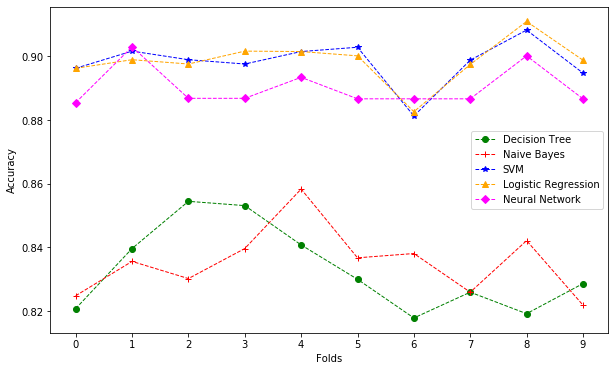

In [32]:
from matplotlib import pyplot as plt
plt.figure(figsize = (10,6))
plt.plot(cv_results['dt'], label = "Decision Tree", color='green', marker='o', linestyle='dashed',
         linewidth=1, markersize=6)
plt.plot(cv_results['nb'], label = "Naive Bayes", color='red', marker='+', linestyle='dashed',
         linewidth=1, markersize=6)

plt.plot(cv_results['svm'], label = "SVM", color='blue', marker='*', linestyle='dashed',
         linewidth=1, markersize=6)

plt.plot(cv_results['lr'], label = "Logistic Regression", color='orange', marker='^', linestyle='dashed',
         linewidth=1, markersize=6)

plt.plot(cv_results['nn'], label = "Neural Network", color='magenta', marker='D', linestyle='dashed',
         linewidth=1, markersize=6)

plt.xticks(np.arange(start=0, stop=10, step=1))
plt.legend(loc = 'best')
plt.xlabel("Folds")
plt.ylabel("Accuracy")
plt.show()

### And Finally, add predictions of all classifiers to the testing file. By looking at the results above, we belive "SVM" and "Logistic Regression" perform equally well, hence we report the outputs for both of them.

In [33]:
df = pd.DataFrame()
df['ID'] = original_testing_data['ID']
df['svm_responded'] = svm_output
df['lr_responded'] = svm_output

In [34]:
df['svm_responded'] = df['svm_responded'].map(idx2val_responded) 
df['lr_responded'] = df['lr_responded'].map(idx2val_responded)

In [35]:
df.head()

,ID,svm_responded,lr_responded
0,0,no,no
1,1,no,no
2,2,no,no
3,3,no,no
4,4,no,no


In [37]:
df.to_csv("result.csv", index=False, encoding = "utf-8")